In [ ]:
# Adarsh Anand
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from typing import List, Dict, Tuple, Any
#import keras as kr,tensorflow as tf,cv2 as cv

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='Blues', font='Arial', rc={'figure.figsize': (10, 8)})

In [ ]:
df=pd.read_csv('./Netflix subscription fee Dec-2021.csv')


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()


In [ ]:
df.corr()

In [ ]:
df.dtypes

In [ ]:
ProfileReport(df,title='Netflix Price in Different Countries')

In [ ]:
msno.matrix(df)

In [ ]:
# posivitve correlation matrix
klib.corr_plot(df)

In [ ]:
#rename attribute columns of dataset
df = df.rename(columns = {'Country_code' : 'Country_Code', 'Total Library Size' : 'Library_Size', 
                         'No. of TV Shows' : 'No_TV_Shows', 'No. of Movies' : 'No_Movies', 
                         'Cost Per Month - Basic ($)' : 'Basic_Cost_Per_Month', 
                         'Cost Per Month - Standard ($)' : 'Standard_Cost_Per_Month', 
                         'Cost Per Month - Premium ($)' : 'Premium_Cost_Per_Month'})
df.head()

In [ ]:
#visualize correlation of each variable using pearson correlation
sns.heatmap(df.corr(), vmax = 0.9, linewidths = 0.9, cmap = 'YlGnBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.show()

In [ ]:
#check unique of country code column
df['Country_Code'].unique()

In [ ]:
#check unique of country column
df['Country'].unique()

In [ ]:
india = df[df['Country'] == 'India']
india

In [ ]:
df.head()

In [ ]:
#visualize top 20 of country based on total basic cost per month
plt.figure(figsize=(10,10))

df.groupby('Country')['Basic_Cost_Per_Month'].sum()

In [ ]:
temp = df.groupby('Country')['Basic_Cost_Per_Month'].sum().sort_values(ascending=False).head(20)

In [ ]:
sns.barplot(y=temp.index, x=temp)

In [ ]:
#visualize top 20 of country based on total standard cost per month
plt.figure(figsize=(10,10))
temp=df.groupby('Country')['Standard_Cost_Per_Month'].sum().sort_values(ascending=False).head(20)

In [ ]:
sns.barplot(y=temp.index, x=temp)

In [ ]:
sns.set_color_codes("pastel")
# show palette pastel
sns.palplot(sns.color_palette("pastel"))

In [ ]:
plt.figure(figsize=(20,82))
df.hist();


Shape of your Data Set loaded: (65, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    8 Predictors classified...
        2 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


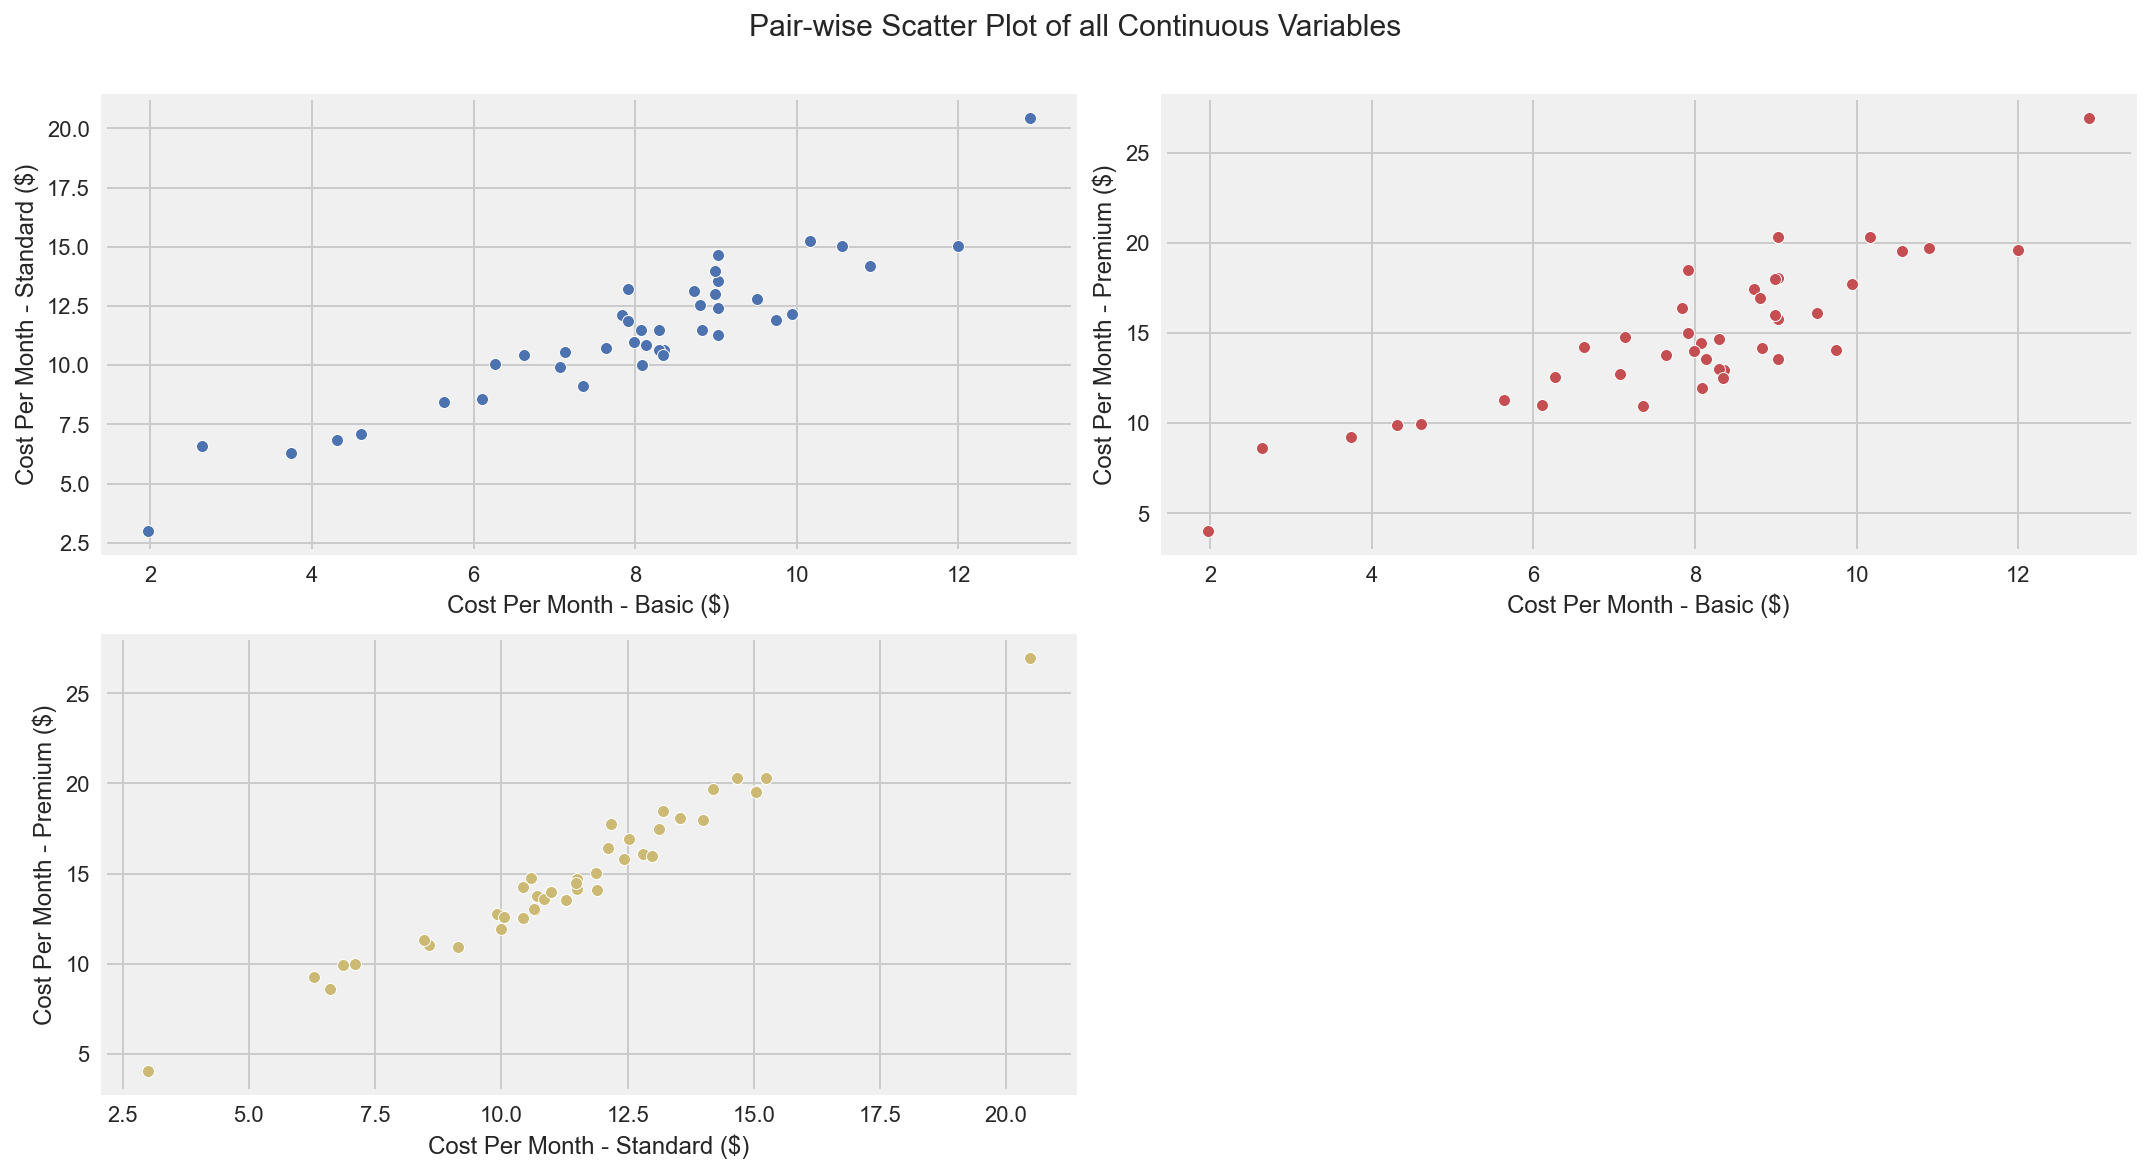

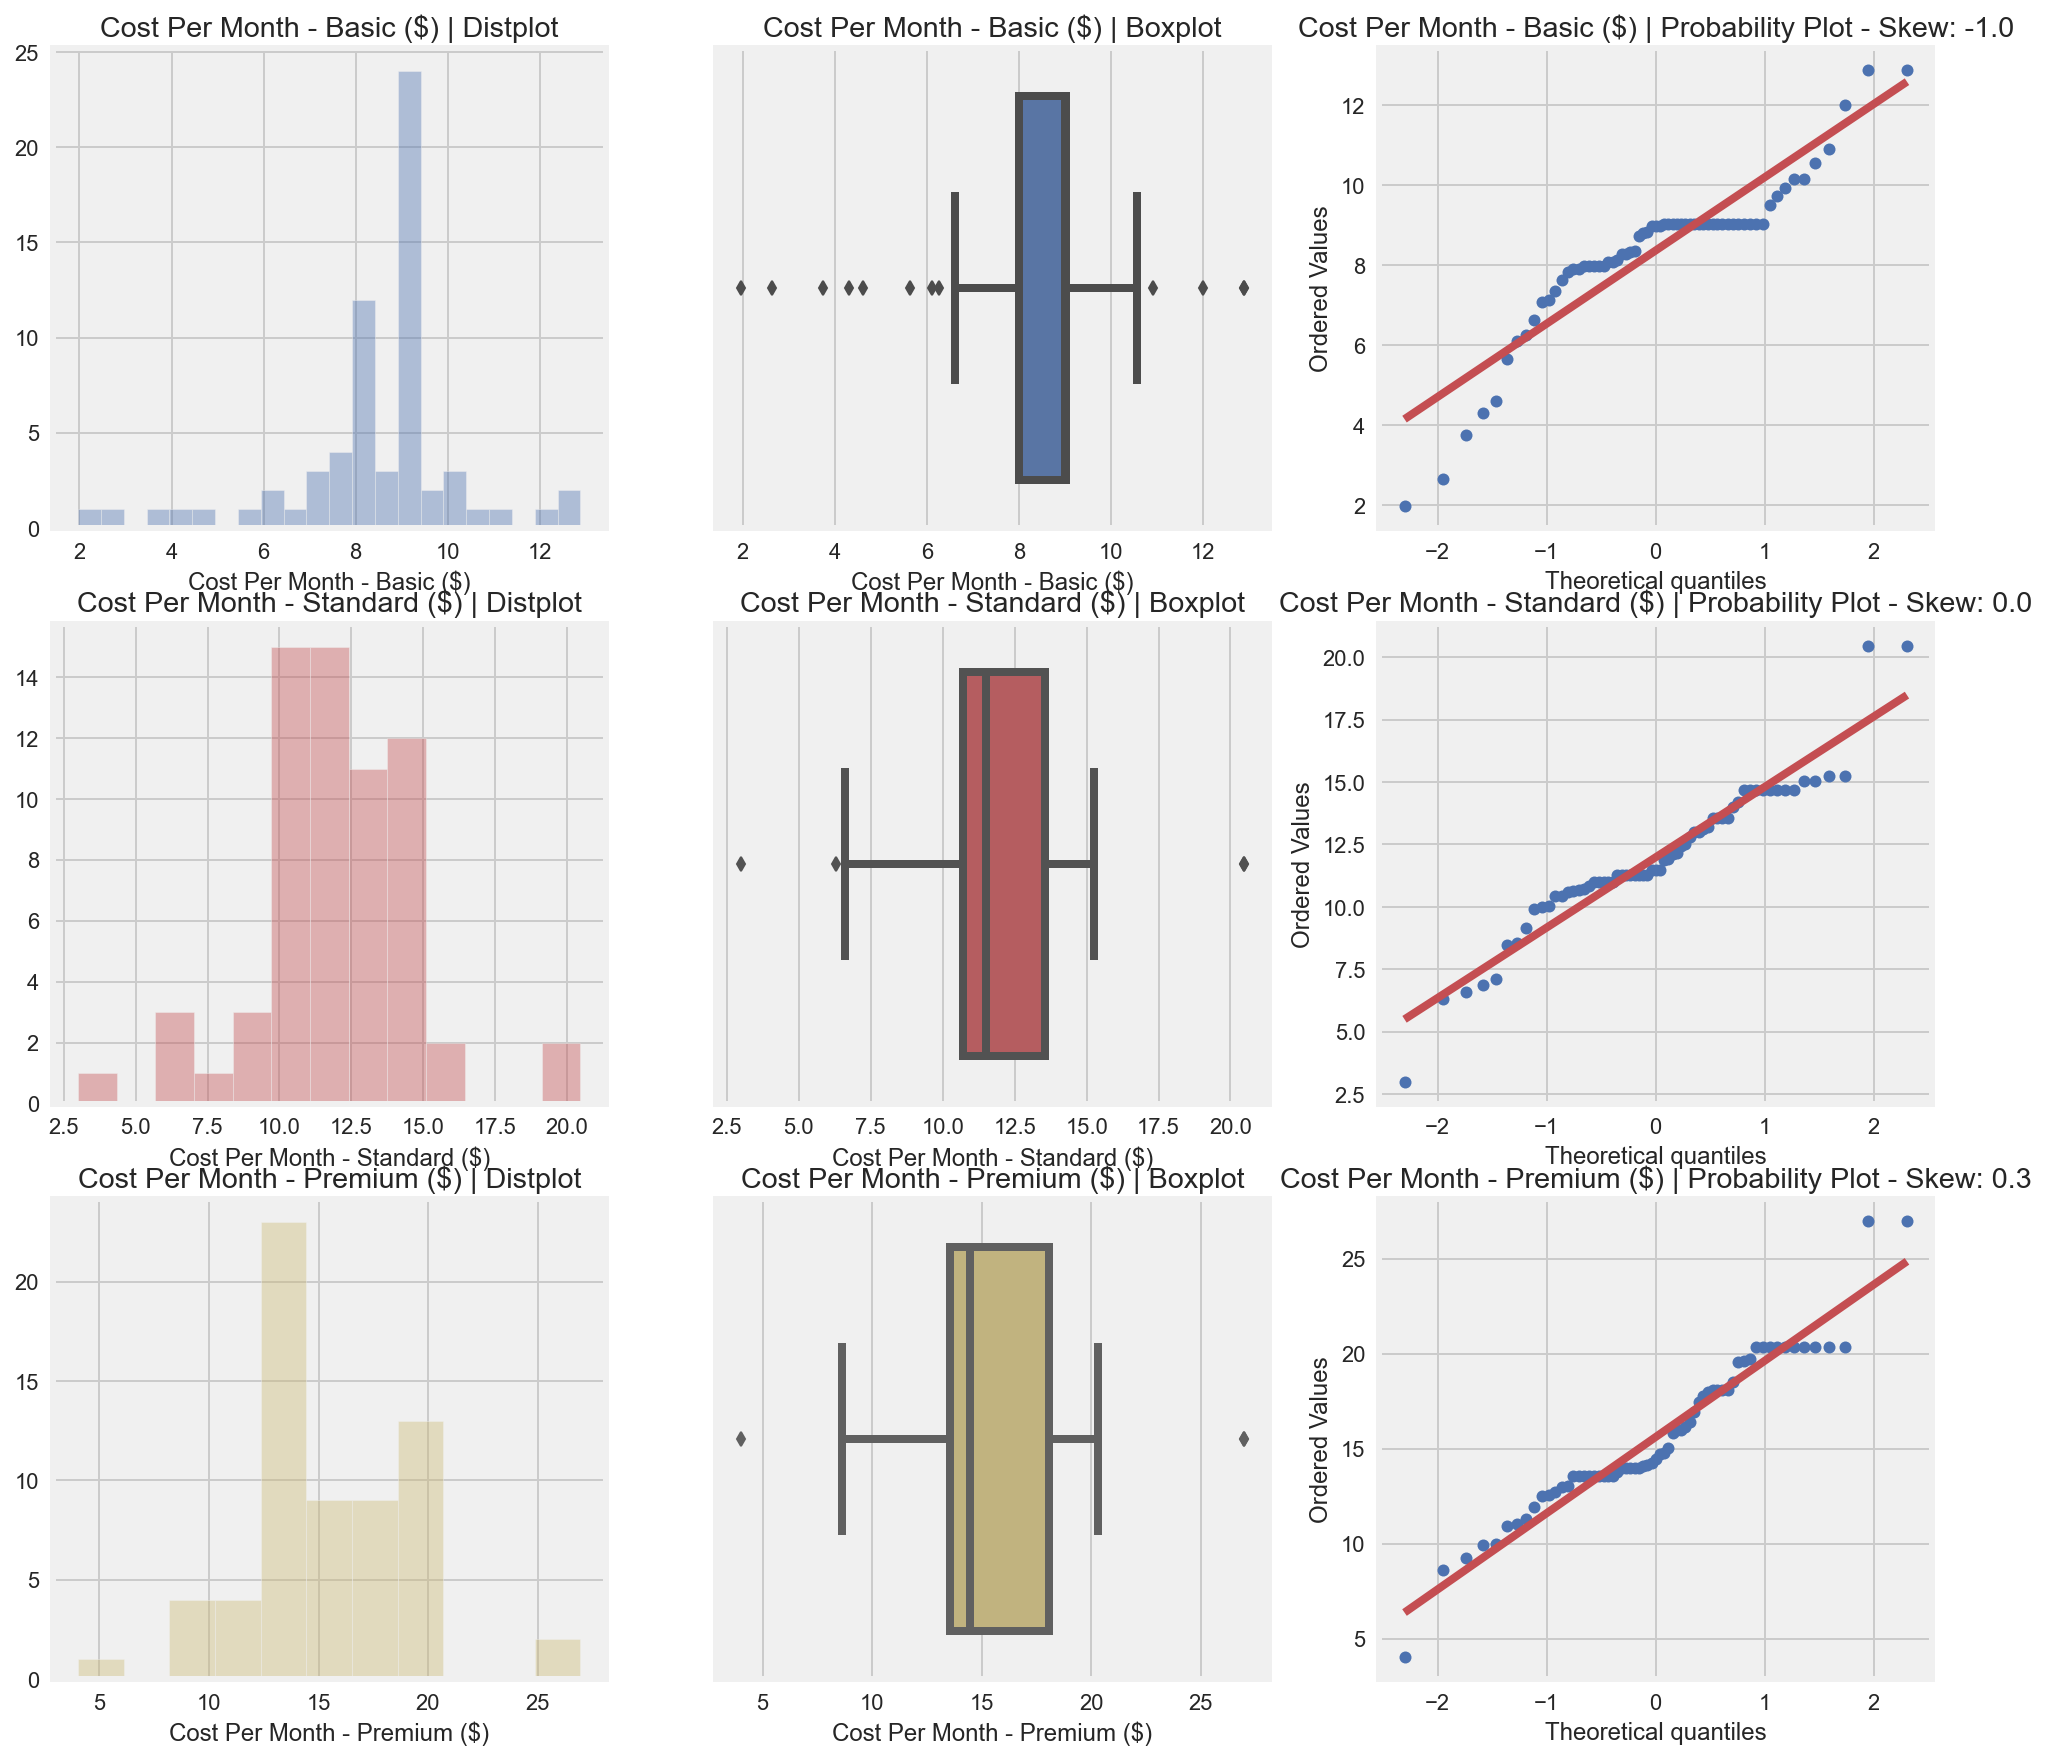

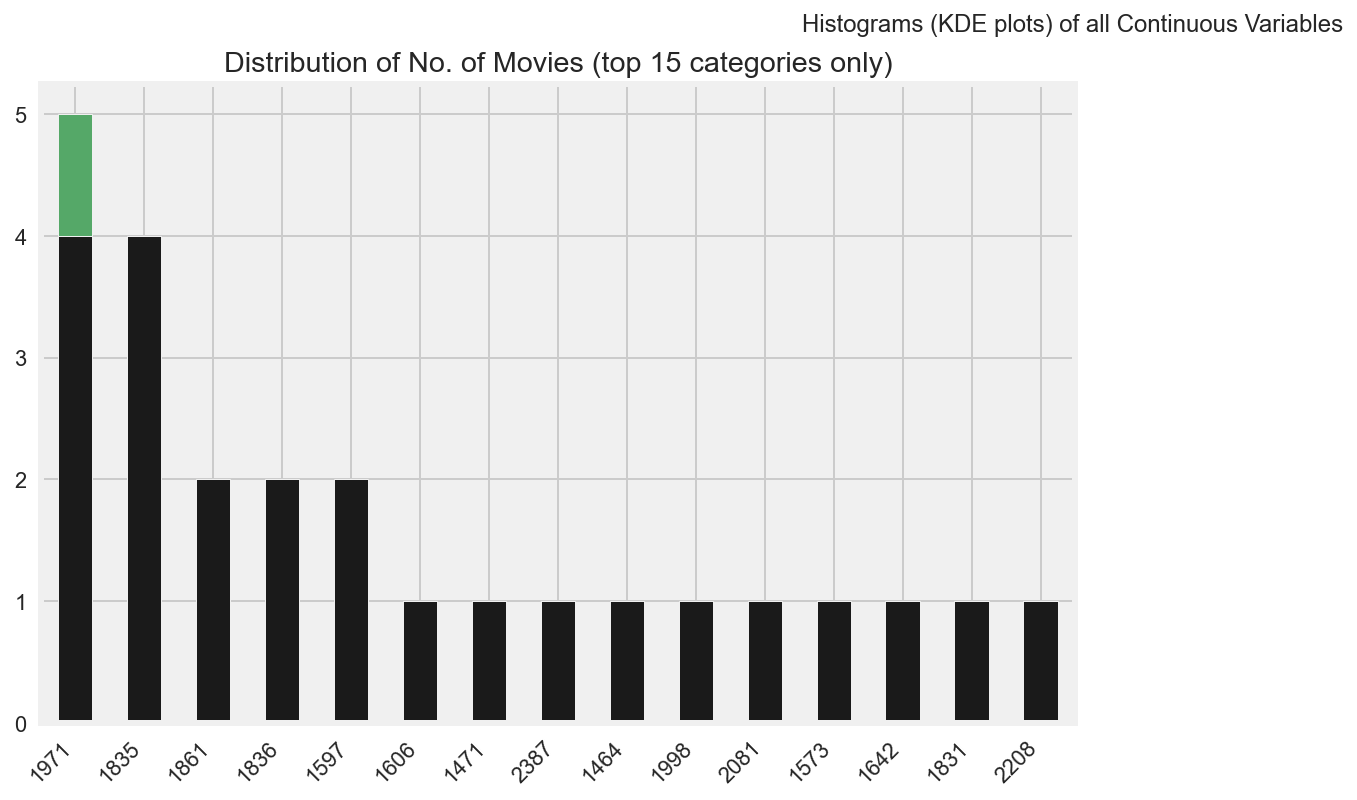

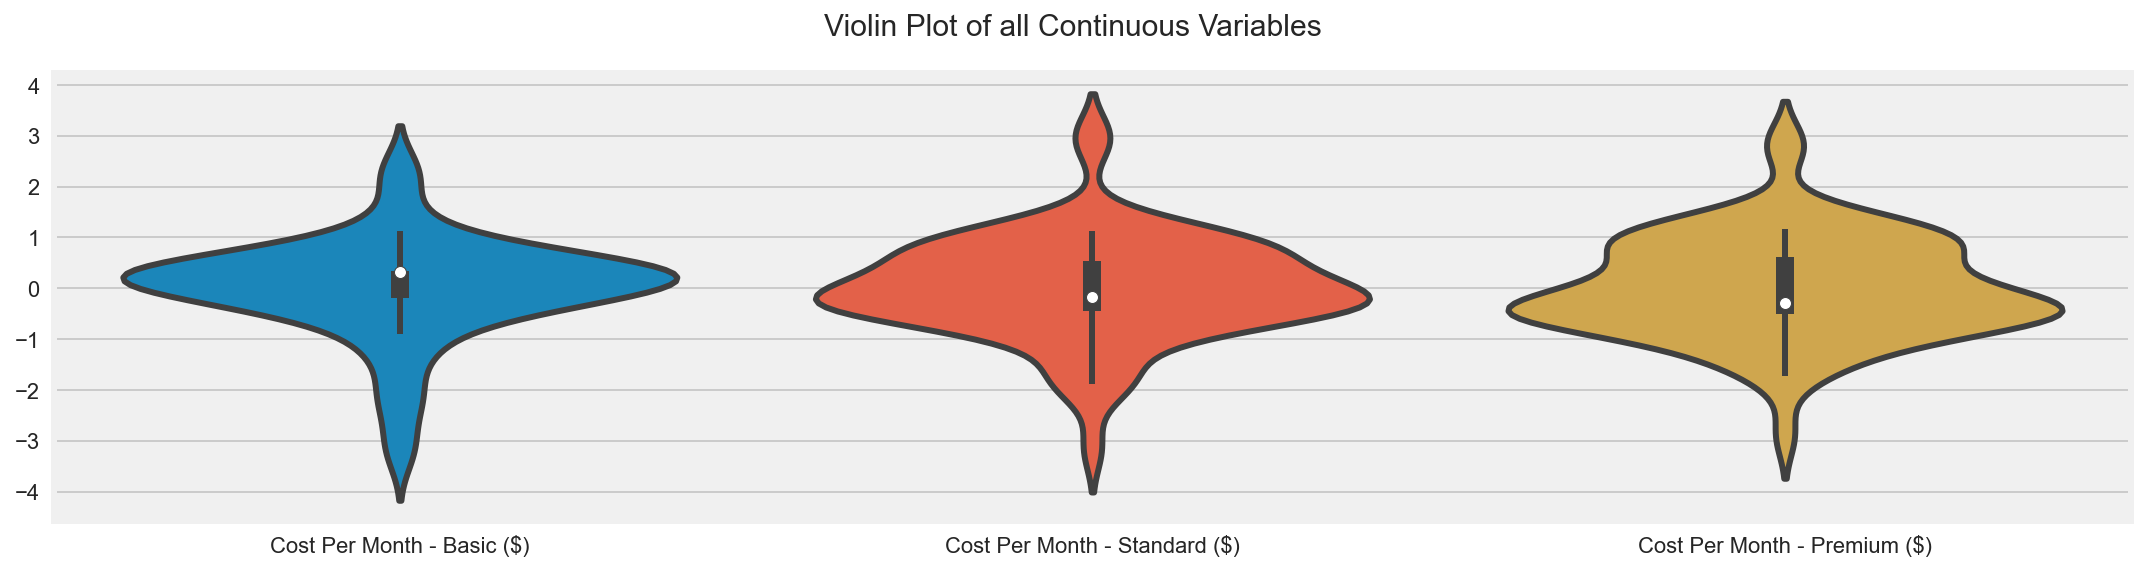

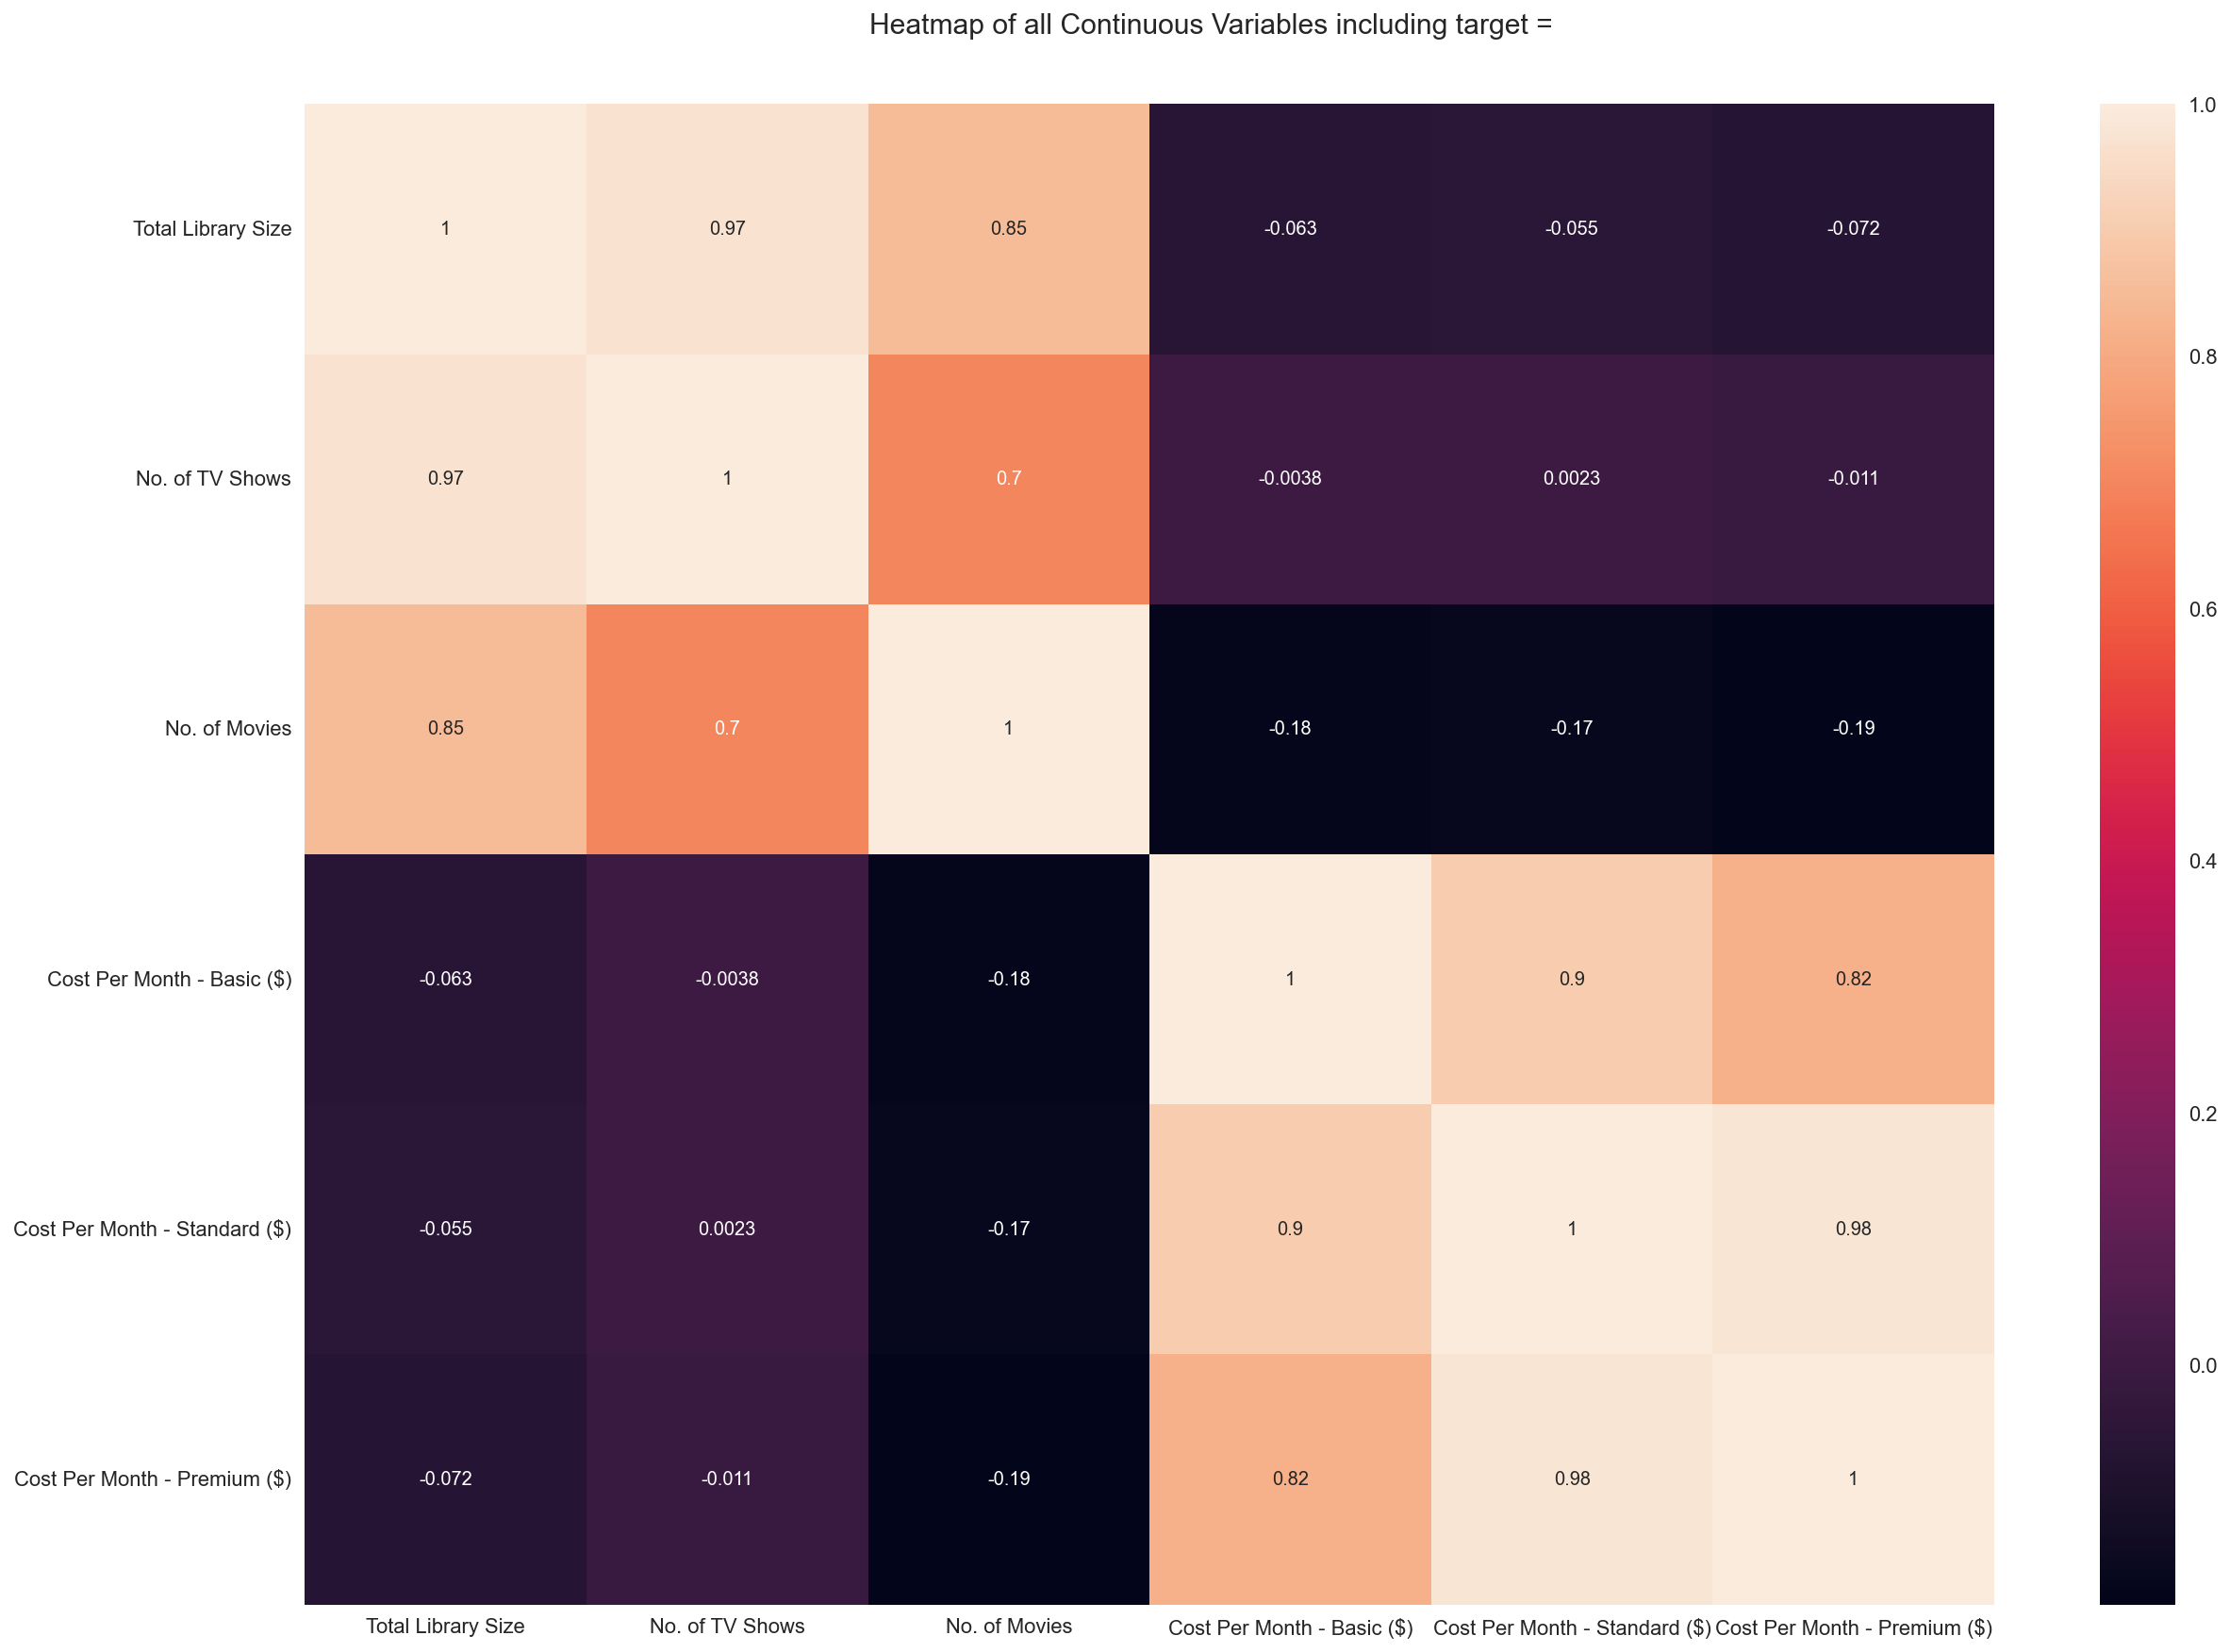

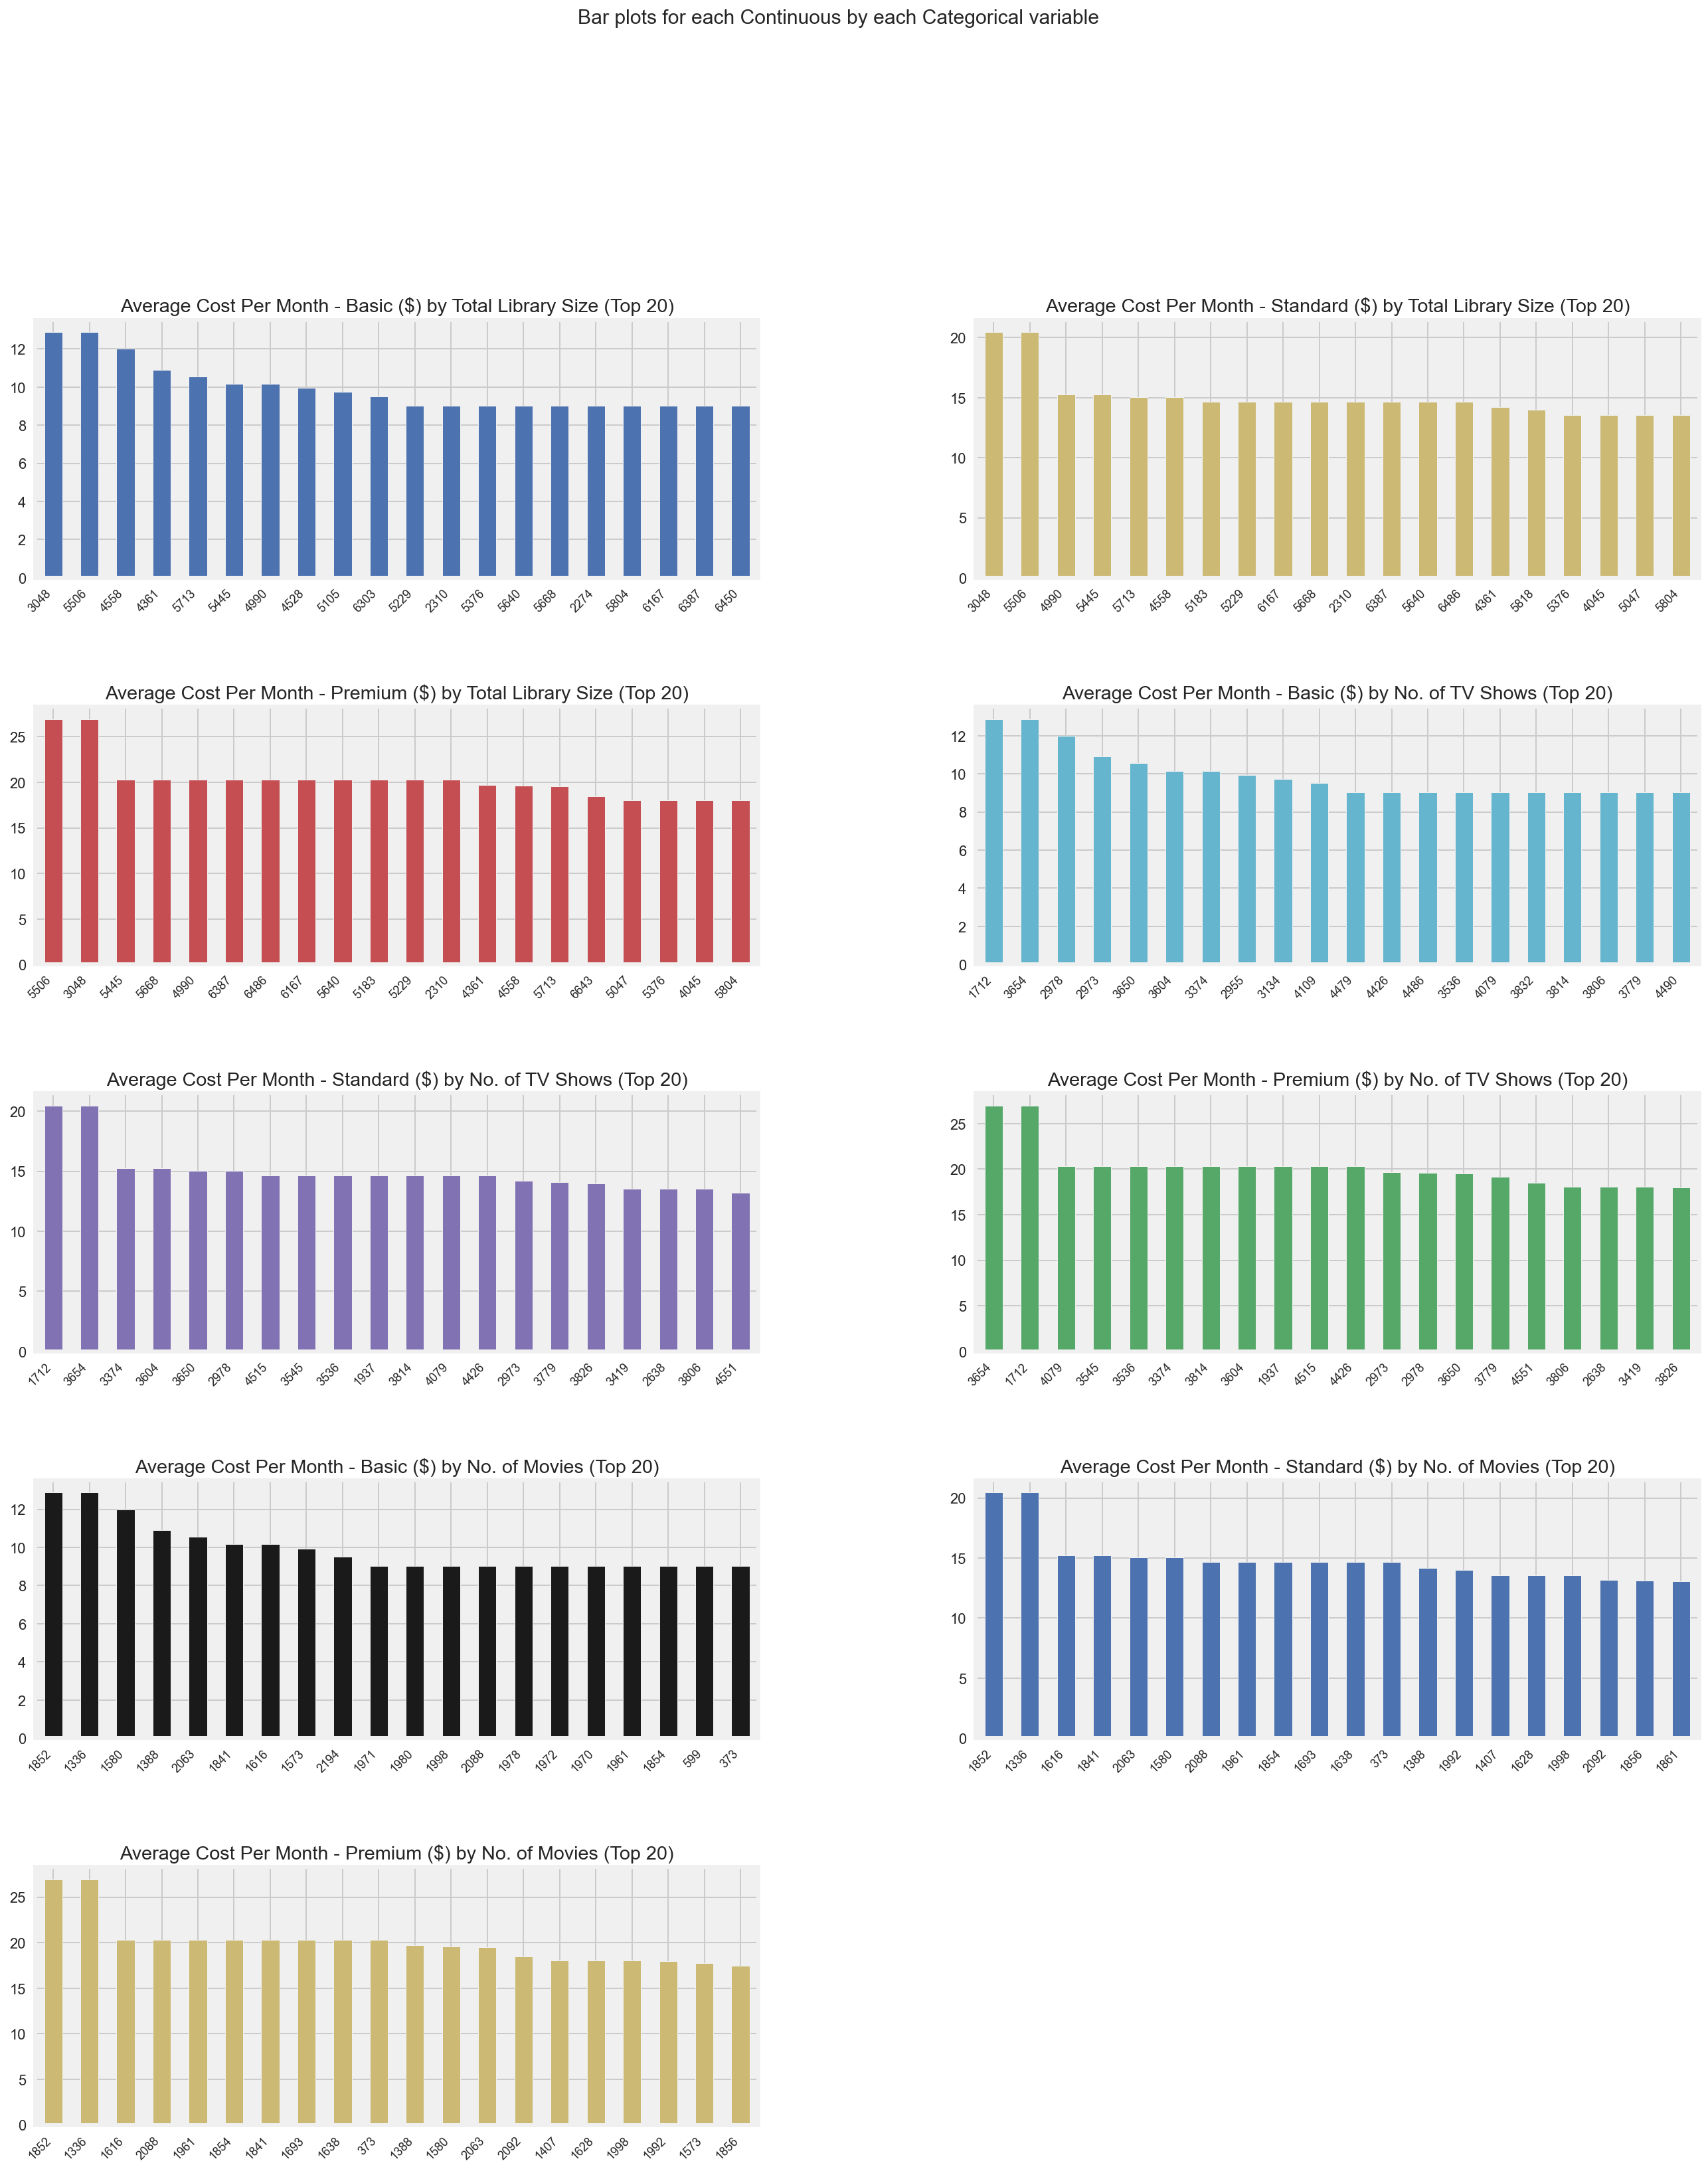

Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [28]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
filename = "./Netflix subscription fee Dec-2021.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)